# Localized HAR based on Wi-Fi CSI {#sec-localized_har}

This section contains the results obtained from the preliminar dataset for localized HAR employing Wi-Fi CSI data. The reported results consist on confusion matrixes from CNN models trained and evaluated using the approaches described in @sec-csi_exp_procedure.

::: {.callout-warning}
## Plotly loading issue
This page contains Plotly interactive figures. Sometimes, the figures might not load properly and show a blank image. **Reloading the page might solve the loading issue**.
:::

## Results

In [1]:
import os
import numpy as np

from libs.chapter5.analysis.reports import extract_metrics, metrics_summary, metric_increment_summary
from libs.chapter5.analysis.visualization import plot_confusion_matrix
from libs.common.utils import load_json

REPORTS_DIR = os.path.join('data', 'chapter5', 'model-reports', 'preliminar-dataset', 'proposed-method', '{}_report.json')
PREDICITON_TARGET = 'Activity'
LABELS = ['SEATED_RX','STANDING_UP_RX','WALKING_TX','TURNING_TX','SITTING_DOWN_TX', 'SEATED_TX', 'STANDING_UP_TX','WALKING_RX','TURNING_RX','SITTING_DOWN_RX']

### 10-fold cross-validation

@fig-cf_cv shows the confusion matrix of the $10$-fold cross-validation approach. The classification accuracy reaches $100\%$ in the `SEATED_RX` and `SEATED_TX`, and activities such as `WALKING_TX`, `TURNING_TX` reach accuracies over $90\%$. Misclassifications can be observed between the sitting down and standing up activities, but a clear diagonal (i.e., perfect prediction) can be seen. 

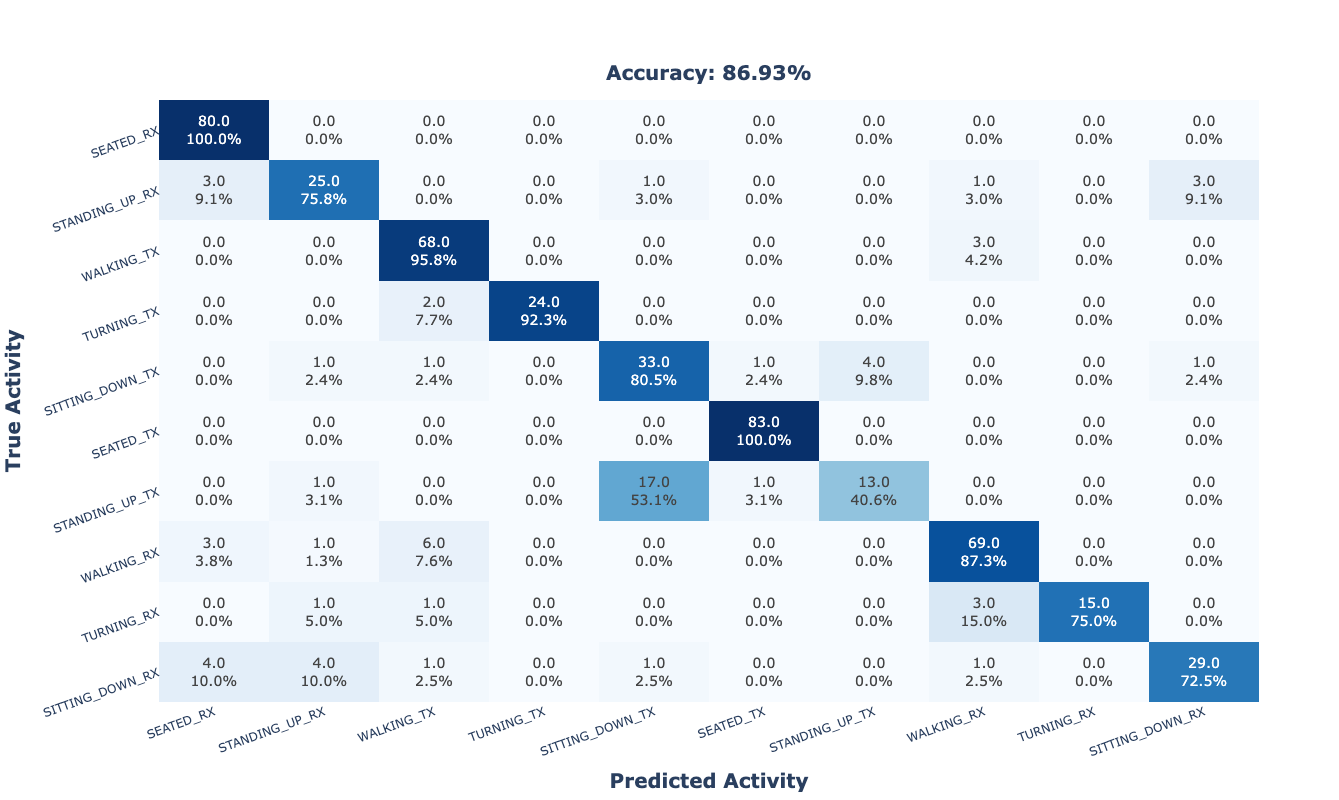

In [2]:
#| label: fig-cf_cv
#| fig-cap: "Confusion matrix of cross-validation approach."
#| column: page-inset-right

cv_reports = load_json(REPORTS_DIR.format('cv'))
mean_accuracy, _, _, _ = extract_metrics(cv_reports)

aggregated_cf = np.zeros((10, 10))
for report in cv_reports:
    aggregated_cf += report['confusion_matrix']

plot_confusion_matrix({ 'accuracy': mean_accuracy, 'confusion_matrix': aggregated_cf }, PREDICITON_TARGET, LABELS)


### Keeping temporal dependency

@fig-cf_d1 (`D1T/D1E`) shows similar results as the previous approach: perfect accuracy on `SEATED_RX` and over $90\%$ on `WALKING_TX` and `SEATED_TX`. In addition, the main diagonal can be perfectly observed.

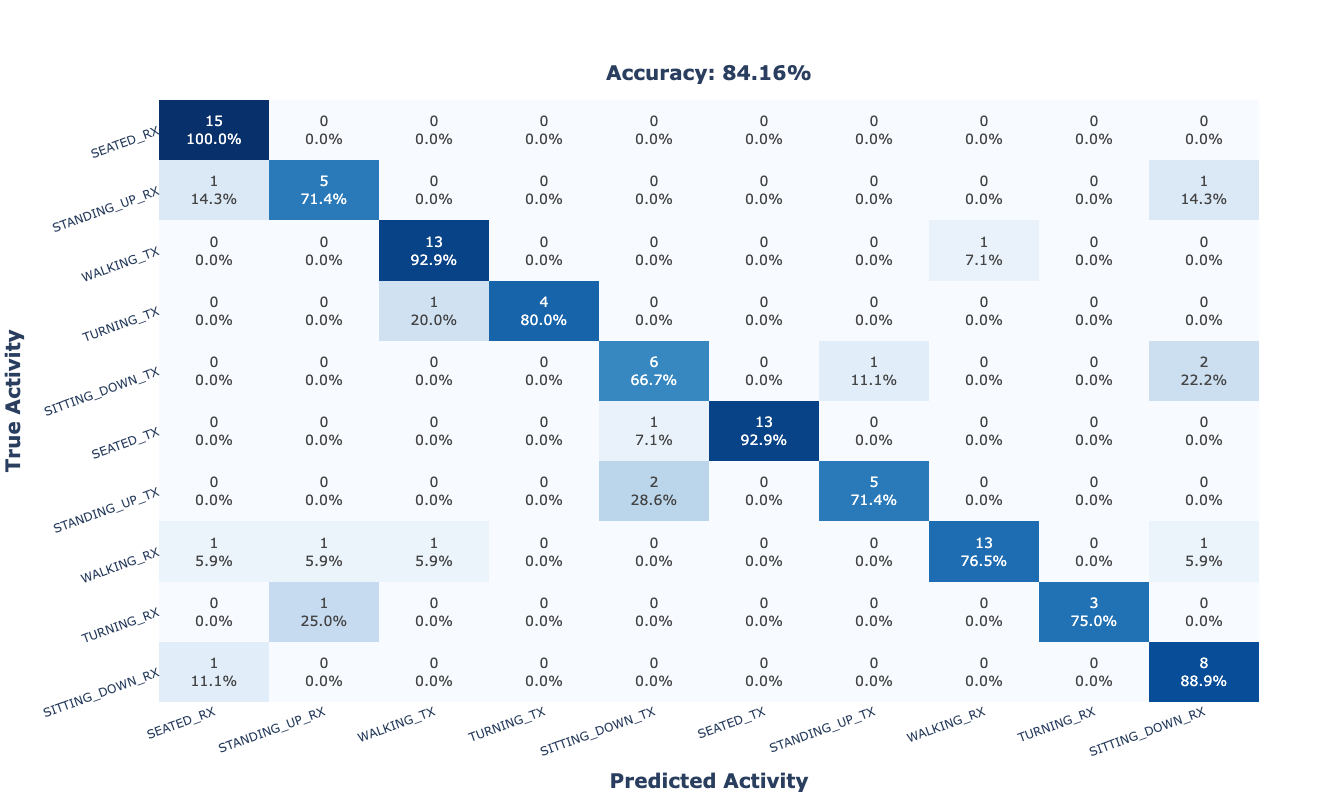

In [3]:
#| label: fig-cf_d1
#| fig-cap: "Confusion matrix of `D1T/D1E` approach."
#| column: page-inset-right

d1_report = load_json(REPORTS_DIR.format('d1'))

plot_confusion_matrix(d1_report, PREDICITON_TARGET, LABELS)

### The effect of time

#### Evaluation with `D2` (10 minutes after `D1`)

In the `D1T/D2` evaluation (@fig-cf_d2), while the diagonal can still be observed, activities such as `SEATED_RX` are mostly misclassified as `WALKING_TX`. However, the `SEATED_TX` or `TURNING_TX` are perfectly classified.

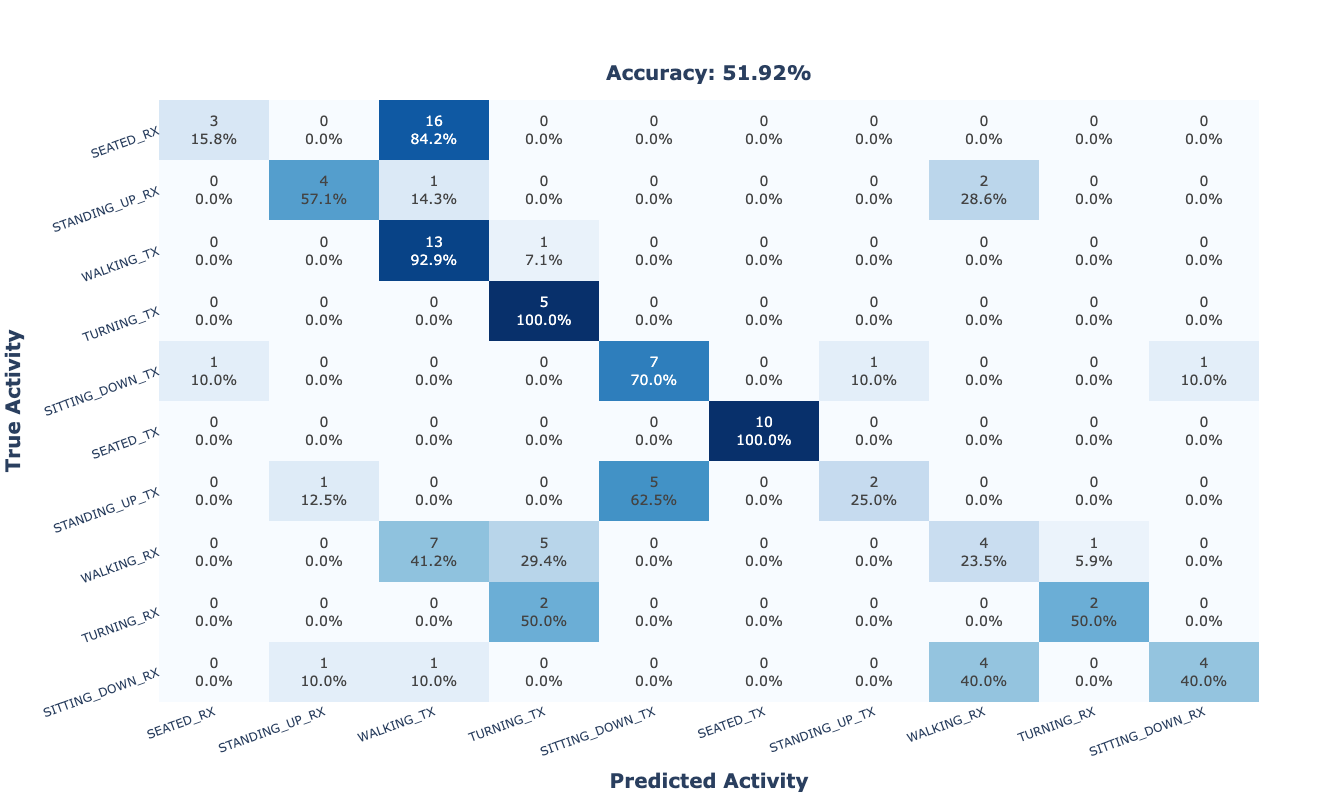

In [4]:
#| label: fig-cf_d2
#| fig-cap: "Confusion matrix of `D1T/D2` approach."
#| column: page-inset-right

d2_report = load_json(REPORTS_DIR.format('d2'))

plot_confusion_matrix(d2_report, PREDICITON_TARGET, LABELS)

#### Evaluation with `D3` (30 minutes after `D1`)

After $30$ minutes (@fig-cf_d3), the diagonal starts to disappear in the activities going towards the Rx, which are misclassified as activities closer to the Tx, such as `WALKING_TX` and `TURNING_TX`. 

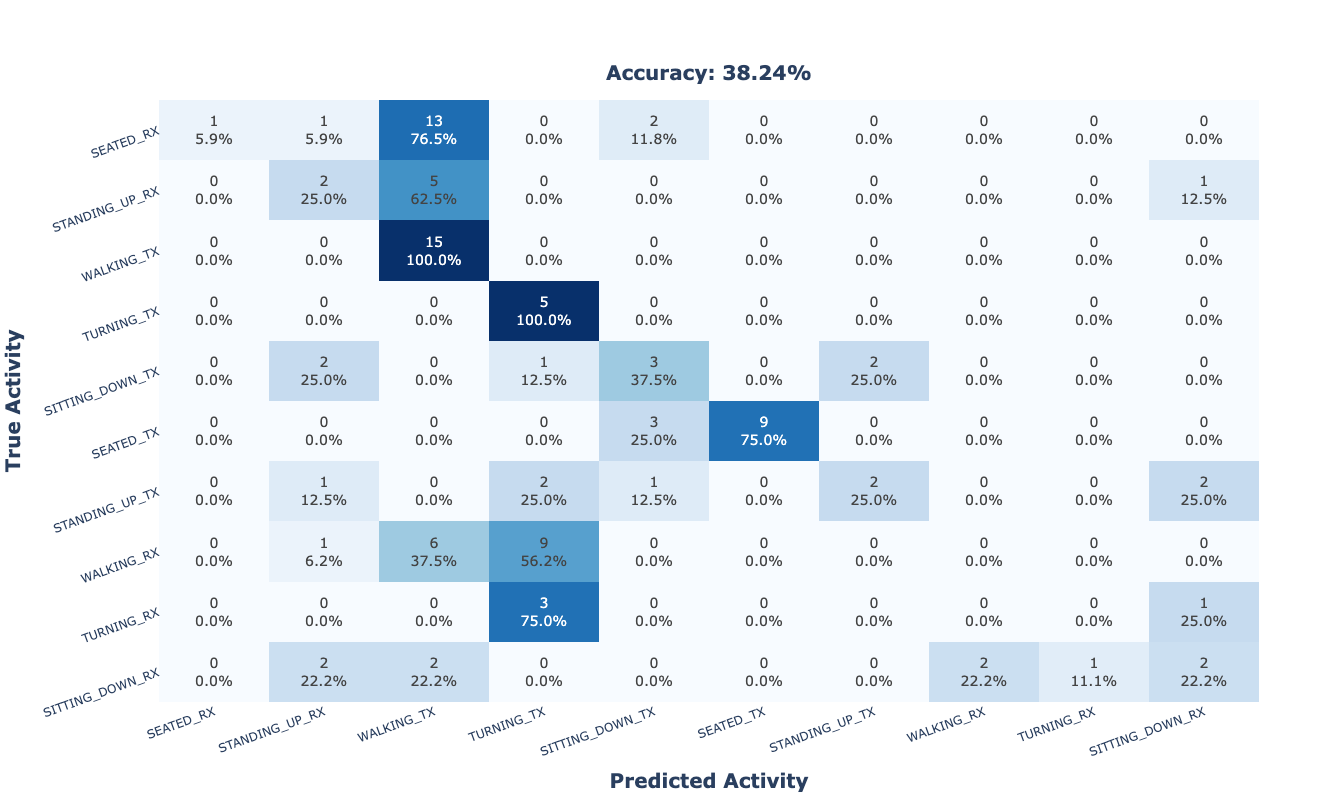

In [5]:
#| label: fig-cf_d3
#| fig-cap: "Confusion matrix of `D1T/D3` approach."
#| column: page-inset-right

d3_report = load_json(REPORTS_DIR.format('d3'))

plot_confusion_matrix(d3_report, PREDICITON_TARGET, LABELS)

#### Evaluation with `D4` (90 minutes after `D1`)

Un the `D1T/D4` (@fig-cf_d4), activities going towards the Rx are completely misclassified, mainly as `WALKING_TX`, `TURNING_TX` and `STANDING_UP_RX`.

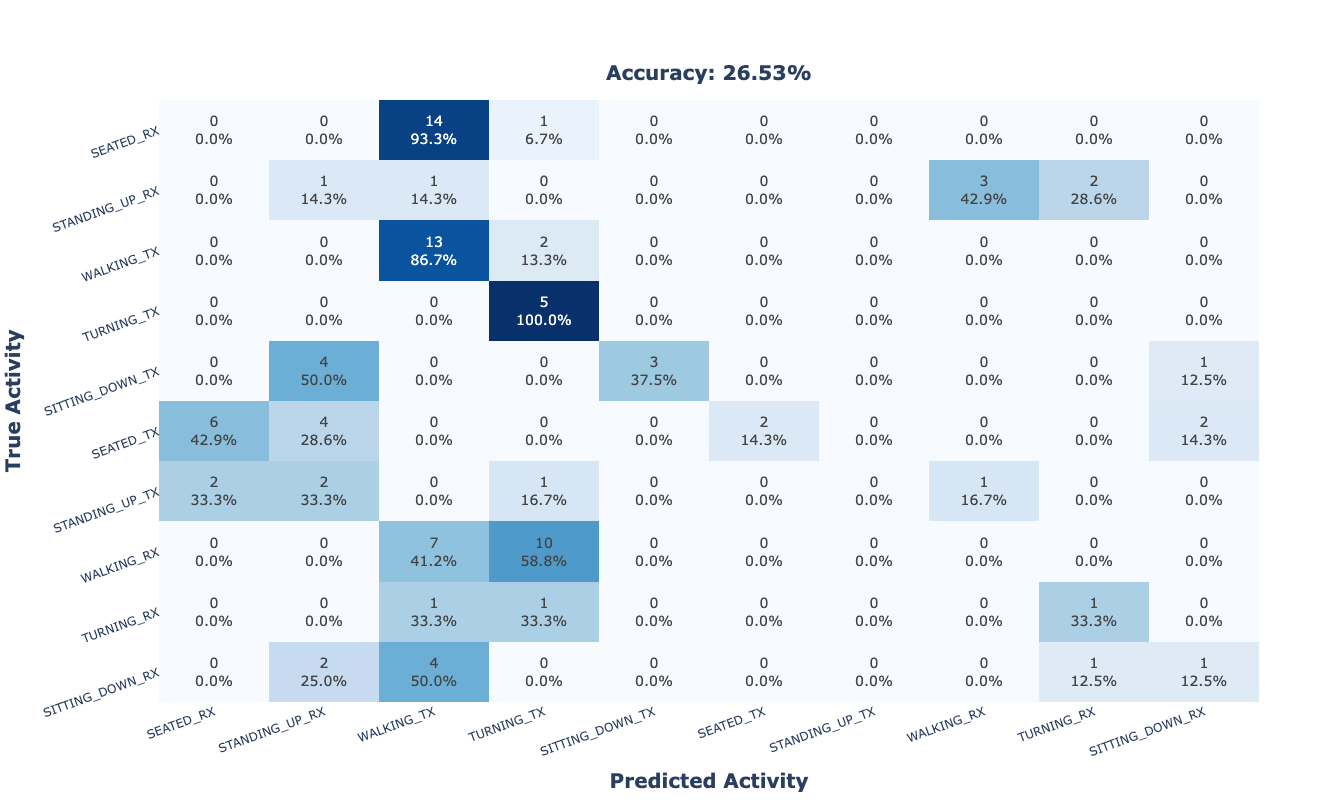

In [6]:
#| label: fig-cf_d4
#| fig-cap: "Confusion matrix of `D1T/D4` approach."
#| column: page-inset-right


d4_report = load_json(REPORTS_DIR.format('d4'))

plot_confusion_matrix(d4_report, PREDICITON_TARGET, LABELS)

## Summary

@tbl-metrics_summary contains the accuracy, precision, recall and F1-score metrics obtained in each evaluation approach and @tbl-metrics_decrement the relative decrement in each metric with regards to the first evaluation approach. The $10$-fold cross-validation achieves the best metrics, with averages around $86-87\%$. Then, in the second approach, where the temporal dependency of the data is maintained in `D1`, the performance metrics slightly decrease around $84-85\%$, showing a relative drop of $\approx3\%$ in accuracy and recall, and $\approx2\%$ in precision and F1-score.

In [7]:
#| label: tbl-metrics_summary
#| tbl-cap: "Summary of obtained metrics in the evaluation approaches."

metrics_summary([cv_reports, d1_report, d2_report, d3_report, d4_report], ['CV', 'D1T/D1E', 'D1T/D2', 'D1T/D3', 'D1T/D4'])

Accuracy  Precision    Recall  F1-score
CV       0.869255   0.870630  0.869255  0.857086
D1T/D1E  0.841584   0.853984  0.841584  0.842004
D1T/D2   0.519231   0.617909  0.519231  0.490104
D1T/D3   0.382353   0.462571  0.382353  0.313558
D1T/D4   0.265306   0.320546  0.265306  0.202500

The evaluation results of the HAR model with `D2`, `D3` and `D4` show a drastic drop in the reported metrics. For instance, the accuracy drops to $\approx52\%$ in `D2`, $\approx38\%$ in `D3` and $\approx26\%$ in `D4`. These results constitute relative accuracy drops of $40.26\%$, $56.01\%$ and $69.47\%$ with data gathered just $10$, $30$ and $90$ minutes after the training data was collected. Similar drops can be observed in the remaining metrics.

In [8]:
#| label: tbl-metrics_decrement
#| tbl-cap: "Decrement (%) of metrics in the evaluation approaches."

comparisons = {
    'CV vs. D1T/D1E': [cv_reports, d1_report],
    'CV vs. D1T/D2': [cv_reports, d2_report],
    'CV vs. D1T/D3': [cv_reports, d3_report],
    'CV vs. D1T/D4': [cv_reports, d4_report],
}
metric_increment_summary(comparisons)

Accuracy  Precision     Recall   F1-score
CV vs. D1T/D1E  -3.183271  -1.911931  -3.183271  -1.759685
CV vs. D1T/D2  -40.267145 -29.027340 -40.267145 -42.817424
CV vs. D1T/D3  -56.013715 -46.869374 -56.013715 -63.415865
CV vs. D1T/D4  -69.478904 -63.182340 -69.478904 -76.373408

These results show a clear degradation in the classification accuracy of the employed CNN model when the evaluation took into account data collected spaced in time regarding the training data. That is, classification accuracy quickly degrades over time. Notwithstanding, temporal instability of \gls{csi} data is only one possible explanation for the poor obtained results. Concretely, the following factors could affect the results:

1. The selected methods might not be able to properly work with CSI data, i.e., generalize from the training data. While CNN approaches have proven to provide good results working with CSI data, most related works using the ESP32 microcontroller employ other architectures, such as the MLP.
2. The employed hardware for CSI extraction, ESP32-S2 microcontroller, might not be appropriate for such a task. Other devices, such as the Intel 5300 or Atheros NICs might be a better option.
3. The collected dataset might have been affected by some external interference, altering the environment and changing the CSI data.
4. The CSI data is not stable over time and therefore can not be used for real-life applications.

Next, points (1) and (4) are explored in @sec-methods_validation and @sec-csi_stability. The remaining factors can not be explored due to resource limitations (2) and the impossibility of determining the existence of external interferences while collecting the dataset (3).

## Code reference

::: {.callout-tip}
The documentation of the Python functions employed in this section can be found in
 [Chapter 5 reference](reference/index.qmd#chapter-5):

- [`reports`](reference/chapter5.analysis.reports.qmd):
  - [`extract_metrics`](reference/chapter5.analysis.reports.qmd#libs.chapter5.analysis.reports.extract_metrics)
  - [`metrics_summary`](reference/chapter5.analysis.reports.qmd#libs.chapter5.analysis.reports.metrics_summary)
  - [`metric_increment_summary`](reference/chapter5.analysis.reports.qmd#libs.chapter5.analysis.reports.metric_increment_summary)
- [`visualization`](reference/chapter5.analysis.visualization.qmd):
  - [`plot_confusion_matrix`](reference/chapter5.analysis.visualization.qmd#libs.chapter5.analysis.visualization.plot_confusion_matrix)
:::